# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [14]:
batch_size = 25

### Carregamento, criação dataset e do dataloader

In [15]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 2400

Dimensões dos dados de um minibatch: torch.Size([25, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [16]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 2400


/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [17]:
model = torch.nn.Linear(28*28, 10)

In [18]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.3282,  0.3832,  0.6597, -0.1000,  0.2624,  1.0344, -0.1614, -0.4117,
          0.3134,  0.2695]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [19]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [20]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        # Print no final de cada minibatch
        print(f'Época: {i+1}/{n_epochs}, batch: {k+1}')

Streaming output truncated to the last 5000 lines.
Época: 3/5, batch: 2201
Época: 3/5, batch: 2202
Época: 3/5, batch: 2203
Época: 3/5, batch: 2204
Época: 3/5, batch: 2205
Época: 3/5, batch: 2206
Época: 3/5, batch: 2207
Época: 3/5, batch: 2208
Época: 3/5, batch: 2209
Época: 3/5, batch: 2210
Época: 3/5, batch: 2211
Época: 3/5, batch: 2212
Época: 3/5, batch: 2213
Época: 3/5, batch: 2214
Época: 3/5, batch: 2215
Época: 3/5, batch: 2216
Época: 3/5, batch: 2217
Época: 3/5, batch: 2218
Época: 3/5, batch: 2219
Época: 3/5, batch: 2220
Época: 3/5, batch: 2221
Época: 3/5, batch: 2222
Época: 3/5, batch: 2223
Época: 3/5, batch: 2224
Época: 3/5, batch: 2225
Época: 3/5, batch: 2226
Época: 3/5, batch: 2227
Época: 3/5, batch: 2228
Época: 3/5, batch: 2229
Época: 3/5, batch: 2230
Época: 3/5, batch: 2231
Época: 3/5, batch: 2232
Época: 3/5, batch: 2233
Época: 3/5, batch: 2234
Época: 3/5, batch: 2235
Época: 3/5, batch: 2236
Época: 3/5, batch: 2237
Época: 3/5, batch: 2238
Época: 3/5, batch: 2239
Época: 3/5, b

In [21]:
print('Final loss:', loss.data)

Final loss: tensor(0.2411)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

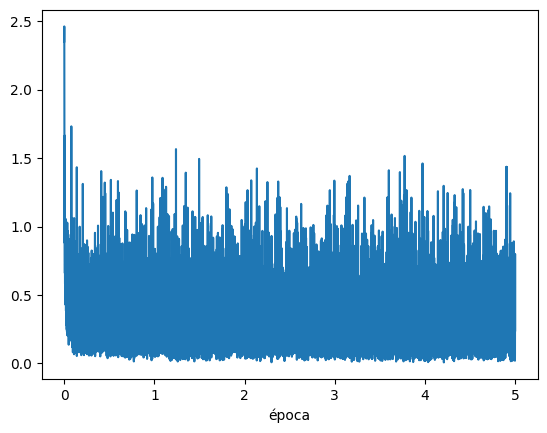

In [22]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

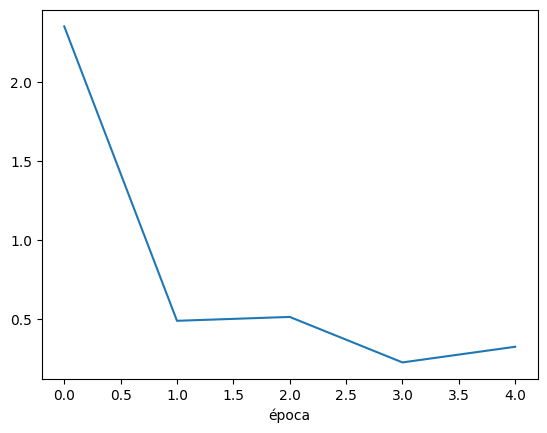

In [23]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
- 25
2. Em uma época, quantos mini-batches existem?
 - 2400 minibatchs
3. Qual é a definição de época?
Ciclo completo de terinamento, onde o treinamento é feito de tal forma que o modelo vÊ cada amostra do conjunto de dados de treinamento por pelo ao menos uma vez. A quantidade de épocas influencia na qualidade do modelo, pois quanto mais ele ve os dados mais rel pode reconhecer padrões, porém, uma quantidade de épocas muito alta pode ocasionar em um problema de outlier.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

## Conclusões sobre os experimentos deste notebook
